In [ ]:
!git clone https://github.com/BPK-Benz/ImageProcessing.git

# There are two choices
1. %cd ..
2. cd ImageProcessing
- final path: /content/ImageProcessing

In [ ]:
import numpy as np
import os
import cv2
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

os.getcwd()

# Basic Python

## 1. Number

In [ ]:
print(1+3) # plus
print(2-1) # minus
print(3*6) # multiply
print(2**3) # power
print(17/3) # divide
print(17//3) # floor divide
print(10%3) #modulo
print(abs(-5)) #absolute
print(max(6,5)) #max value

## 2. Numpy array: 1D

In [ ]:
import numpy as np

array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array

In [ ]:
# shape
print(array.shape)

# arithmatic
print(array + 15)
print(20 - array)
print(array * 10)

# index
print(array[3])
print(array[3:])
print(array[::-1])
print(np.concatenate([array, array], axis=0))

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array[1] = 2
array

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array[4:8] = [1, 2, 3, 4]
array

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array[::2] = 0
array

In [ ]:
# modify
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8])
array[array<5] = 50
array

## 3. Numpy array: 2D

In [ ]:
array2d = np.array([
           [1, 2, 3],
           [3, 4, 5],
           [5, 6, 7],
           [7, 8, 9],
])
array2d

In [ ]:
# shape
print(array2d.shape)

# arithmatic
print(array2d + 10)
print(array2d * 10)

# index
print(array2d[-1, -1])
print(array2d[1:, :2])
print(array2d[::-1, ::-1])
print(np.concatenate([array2d, array2d], axis=0))
print(np.concatenate([array2d, array2d], axis=1))

In [ ]:
zeros = np.zeros([4, 4], np.uint8)
zeros

In [ ]:
ones = np.ones([4, 4], np.uint8)
ones

In [ ]:
full = np.full([4, 4], 5, np.uint8)
full

## Exercises

### **1.)** Fibonacci
the standard formula: Fn= Fn-1+Fn-2, with initial values F0 = 0 and F1 = 1.

> Create an 1D Array of 30 first number in Fibonacci sequence.

### **2.)** 1.3 to 8.2

> Create an 1D Array of 30 evenly spaced elements between 1.3 and 8.2 inclusive.

### **3.)** Chess Board

> Create Chess-like Pattern on 8x8 2D Array

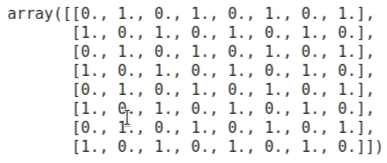

# Introduction to Image Processing.

## What's an image? from AIThaigen website

https://aithaigen.in.th/flow/image-processing (my gmail) 

please see outline from powerpoint

## Grayscale Image

### Load an Image.

<!-- run: image -->
<!-- run: image.shape -->

In [ ]:
import os
import cv2
import plotly.express as px

# example paths
img_path = os.path.join(os.getcwd(), "images", "lenna.png")

# load an image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# plot
fig = px.imshow(image, color_continuous_scale='gray')
fig.show()

### Plot Intensity in 3D


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=image, colorscale='gray')])
fig.update_layout(
    autosize=False,
    height=700,
)
fig.update_scenes(xaxis_autorange="reversed")
fig.show()

## Histogram
see histogram Lab: https://bpk-benz.github.io/histrogramLab/

please see outline from powerpoint

# Example 1: The Hidden Message

<!-- ---------------------------------------- -->
<!-- image *= 15 -->
<!-- ---------------------------------------- -->
<!-- image[image > 17] = 255 -->
<!-- image *= 15 -->
<!-- ---------------------------------------- -->
<!-- image[image < 17] = image[image < 17] * 15 -->
<!-- ---------------------------------------- -->
<!-- https://github.com/thearn/webcam-pulse-detector -->


In [ ]:
# load an image
fireflies = os.path.join(os.getcwd(), "images/movies", "grave_of_the_fireflies.jpg")
image = cv2.imread(fireflies, cv2.IMREAD_GRAYSCALE)

# plot
fig = px.imshow(image, color_continuous_scale='gray', height=800)
fig.show()

In [ ]:
# image enhancement
image = image * 15

# plot
fig = px.imshow(image, color_continuous_scale='gray', height=800)
fig.show()

## Color Space

https://bpk-benz.github.io/RGB_HSV/

![](https://miro.medium.com/max/1700/1*W30TLUP9avQwyyLfwu7WYA.jpeg)


### Red, Green, Blue

<!-- image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) -->

In [ ]:
from plotly.subplots import make_subplots
# example paths
objects = os.path.join(os.getcwd(), "images", "fourObjects.png")

# load an image
image = cv2.imread(objects)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "image (BGR array shown as RGB → สีเพี้ยน)",
        "img_rgb (BGR→RGB → สีถูกต้อง)"
    )
)

fig.add_trace(go.Image(z=image), row=1, col=1)
fig.add_trace(go.Image(z=img_rgb), row=1, col=2)

# ปรับ layout ให้มีพื้นที่ด้านบนมากขึ้น (เพื่อยกหัวข้อให้สูงขึ้นแล้วไม่โดนตัด)
fig.update_layout(
    height=450,
    margin=dict(l=10, r=10, t=120, b=10)  # เพิ่ม t จากเดิม
)

# ปรับตำแหน่งและสีของ subplot titles (ซึ่งคือ annotations)
for ann in fig.layout.annotations:
    ann.update(
        y=1.08,                 # ยกตำแหน่งขึ้น (ค่าเริ่มต้นมักใกล้ 1.0)
        yanchor="bottom",       # ยึดฐานตัวหนังสือไว้ด้านล่าง
        yshift=10,              # เลื่อนขึ้นเพิ่มแบบละเอียด (หน่วยเป็นพิกเซล)
        font=dict(
            color="#0000FF",    # น้ำเงินสด
            size=16
        )
    )

fig.show()

In [ ]:
# check image space
height, width, depth = image.shape
print('Height =', height, 'pixels')
print('Width  =', width, 'pixels')
print('Depth  =', depth, 'channels')

In [ ]:
R, G, B = cv2.split(img_rgb)

def to_gray_rgb(ch2d: np.ndarray) -> np.ndarray:
    ch2d = ch2d.astype(np.uint8)
    return np.stack([ch2d, ch2d, ch2d], axis=-1)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Original (RGB)", "Red channel", "Green channel", "Blue channel"),
    horizontal_spacing=0.04,
    vertical_spacing=0.08
)


fig.add_trace(go.Image(z=img_rgb),              row=1, col=1)
fig.add_trace(go.Image(z=to_gray_rgb(R)),       row=1, col=2)
fig.add_trace(go.Image(z=to_gray_rgb(G)),       row=2, col=1)
fig.add_trace(go.Image(z=to_gray_rgb(B)),       row=2, col=2)


fig.update_xaxes(showticklabels=False, ticks="", visible=False)
fig.update_yaxes(showticklabels=False, ticks="", visible=False, autorange="reversed")


fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=20, b=10),

    xaxis=dict(constrain="domain"),
    yaxis=dict(scaleanchor="x",  scaleratio=1),

    xaxis2=dict(constrain="domain"),
    yaxis2=dict(scaleanchor="x2", scaleratio=1),

    xaxis3=dict(constrain="domain"),
    yaxis3=dict(scaleanchor="x3", scaleratio=1),

    xaxis4=dict(constrain="domain"),
    yaxis4=dict(scaleanchor="x4", scaleratio=1),
)

# ปรับตำแหน่งและสีของ subplot titles (ซึ่งคือ annotations)
for ann in fig.layout.annotations:
    ann.update(
        font=dict(
            color="#0000FF",    
            size=16
        )
    )

fig.show()

### Hue, Saturation, Value

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Hue", "Saturation", "Value")
)

# process
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
channels = cv2.split(hsv_image)

# plot
for i in range(len(channels)):
  fig.add_trace(
      px.imshow(channels[i]).data[0],
      row=1, col=i+1
  )
fig.update_yaxes(autorange='reversed')
fig.update_layout(coloraxis = {'colorscale':'gray'}, width=1200)
fig.show()

### Example 2: Color Manipulaion

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Original", "Processed 1", "Processed 2", "Processed 3")
)

# load an image
image_path = os.path.join(os.getcwd(), "images/movies", "it.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
red, green, blue = cv2.split(image)
out1 = cv2.merge([red, blue, green])
out2 = cv2.merge([green, red, blue])
out3 = cv2.merge([blue, green, red])

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out1).data[0],
    row=1, col=2
)
fig.add_trace(
    px.imshow(out2).data[0],
    row=1, col=3
)
fig.add_trace(
    px.imshow(out3).data[0],
    row=1, col=4
)
fig.show()

## Pixels Transformation

In [ ]:
# load an image
image_path = os.path.join(os.getcwd(), "images", "9gag.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot
fig = px.imshow(image)
fig.show()

In [ ]:
# check image space
height, width, depth = image.shape
print('Height =', height, 'pixels')
print('Width  =', width, 'pixels')
print('Depth  =', depth, 'channels')

### Resize and Rotate

In [ ]:
# initiate figures
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Original", "Resize", "Rotate", "Rotate + Resize")
)

# resize
out1 = cv2.resize(image, (1500, 200))

# rotate
out2 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# rotate + resize
out3 = cv2.resize(out2, (2500, 200))

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out1).data[0],
    row=1, col=2
)
fig.add_trace(
    px.imshow(out2).data[0],
    row=2, col=1
)
fig.add_trace(
    px.imshow(out3).data[0],
    row=2, col=2
)
fig.update_layout(width=1000)
fig.show()

### Flip

<!-- out = image[::-1] -->


In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Flip Vertical")
)

# load an image
image_path = os.path.join(os.getcwd(), "images/movies", "spider_man_into_the_spider_verse.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
out = cv2.flip(image, 0)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_layout(width=1000)
fig.show()

### Cut and Concatanate

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Original", "Left", "Right", "Concatanate")
)

# load an image
image_path = os.path.join(os.getcwd(), "images/movies", "after_earth.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
cut1 = image[:, :200]
cut2 = image[:, 200:]
concat = np.concatenate((cut2, cut1), axis=1)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(cut1).data[0],
    row=1, col=2
)
fig.add_trace(
    px.imshow(cut2).data[0],
    row=1, col=3
)
fig.add_trace(
    px.imshow(concat).data[0],
    row=1, col=4
)
fig.show()

### Crop and Patch

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Original", "White Queen", "Checkmate!")
)

# load an image
image_path = os.path.join(os.getcwd(), "images", "chess.png")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# resize
board = cv2.resize(image, (801, 801))

# crop
queen = board[700:800, 300:400]

# patch
new_board = board.copy()
new_board[0:100, 400:500] = queen

# plot
fig.add_trace(
    px.imshow(board).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(queen).data[0],
    row=1, col=2
)
fig.add_trace(
    px.imshow(new_board).data[0],
    row=1, col=3
)
fig.show()

### Invert

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Inverse")
)

# load an image
image_path = os.path.join(os.getcwd(), "images/movies", "the_godfather.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
out = 255 - image

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_layout(width=1000)
fig.show()

### Histograms Equalization

<!-- low contrast -->
<!-- backlit -->
<!-- overexposure & underexposure -->
<!-- grave_of_the_fireflies -->

<!--
# process
channels = cv2.split(image)
for i in range(len(channels)):
  channels[i] = cv2.equalizeHist(channels[i])
out = cv2.merge(channels)
 -->

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Balanced")
)

# load an image
image_path = os.path.join(os.getcwd(), "images", "giraffe.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# process
out = cv2.equalizeHist(image)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_yaxes(autorange='reversed')
fig.update_layout(coloraxis = {'colorscale':'gray'}, width = 700)
fig.show()

In [ ]:
# Initialize figure with 2 3D subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(z=image, colorscale='gray', cmin=0, cmax=255),
    row=1, col=1)
fig.add_trace(
    go.Surface(z=out, colorscale='gray', cmin=0, cmax=255),
    row=1, col=2)
fig.update_layout(
    scene = dict(zaxis = dict(range=[0,255])))
fig.update_scenes(
    xaxis_autorange="reversed",
    aspectratio=dict(x=1, y=1, z=1))
fig.show()

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Balanced")
)

# load an image
image_path = os.path.join(os.getcwd(), "images", "backlit2.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
channels = list(cv2.split(image))
for i in range(len(channels)):
  channels[i] = cv2.equalizeHist(channels[i])
out = cv2.merge(channels)

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_layout(width=1000)
fig.show()

### Blur

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Blur")
)

# load an image
image_path = os.path.join(os.getcwd(), "images/movies", "fight_club.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# process
out = cv2.blur(image, (15, 15))

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.update_layout(width=1000)
fig.show()

## Exercises

### **4.)** Light Up!

In [ ]:
# Enhance this image.

# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Output")
)

# load an image
image_path = os.path.join(os.getcwd(), "images/hela", "01.png")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# code your algorithm here.
# 1. Mathematic
# 2. Gamma correction
# 3. Contrast Stretching

# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.show()

### **5.)** Revert these apples.

> Make them green.

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Output")
)

# load an image
image_path = os.path.join(os.getcwd(), "images", "apples02.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# code your algorithm here.



# plot
fig.add_trace(
    px.imshow(image).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(out).data[0],
    row=1, col=2
)
fig.show()

### **6.)** Scholar's Mate

>Rendering the final outcome of the following chess moves:

- White - Pawn e2 to e4
- Black - Pawn e7 to e5
- White - Queen d1 to h5
- Black - Knight b8 to c6
- White - Bishop f1 to c4
- Black - Knight g8 to c6
- White - Queen h5 to f7

![](https://www.regencychess.co.uk/images/how-to-set-up-a-chessboard/how-to-set-up-a-chessboard-1a.jpg)

Chess board layout

In [ ]:
# initiate figures
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Original", "Checkmate!")
)

# load an image
image_path = os.path.join(os.getcwd(), "images", "chess.png")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# code your algorithm here.


# plot
fig.add_trace(
    px.imshow(board).data[0],
    row=1, col=1
)
fig.add_trace(
    px.imshow(new_board).data[0],
    row=1, col=2
)
fig.show()


**Image Thresholding**

*   This is a technique in computer vision to determine image pixels property based on
their intensity. The trick is straight forward. If a pixel value is higher than a threshold value, it
is assigned one value, else it is assigned another value. This technique can be used for
extracting regions of interest from the image as the mask.

**Bitwise Operators**

*   These are techniques for manipulating images. By applying pointwise logic operation
between images, we can generate many applications, for example inverting an image,
overlaying masks over an image, and removing the background.

**Morphological Transformations**

*   These are techniques for operating binary images based on its structure. By applying
a kernel to the structure boundary, we can generate erosion, dilation, and noise removed
images.

### Example: Clips detection.

In [ ]:
import matplotlib.pyplot as plt

clips = os.path.join(os.getcwd(), "images", "clips.jpg")

# load an image
image = cv2.imread(clips)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot
f, axs = plt.subplots(figsize=(15,15))
plt.imshow(image);

In [ ]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

# get threshold
# ถ้า pixel > 80 → ให้ค่า 255 (ขาว)
# ถ้า pixel ≤ 80 → ให้ค่า 0 (ดำ)
# cv2.threshold(src, thresh, maxval, type)
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
# ret, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# invert an image
invert = cv2.bitwise_not(thresh)

# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Grayscale", fontsize=13, fontweight="bold")
axes[0].axis("off")

axes[1].imshow(thresh, cmap="gray", vmin=0, vmax=255)
axes[1].set_title("Threshold = 80", fontsize=13, fontweight="bold")
axes[1].axis("off")

axes[2].imshow(invert, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("Inverted", fontsize=13, fontweight="bold")
axes[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
_, bin_inv = cv2.threshold(invert, 127, 255, cv2.THRESH_BINARY)

# --- Morphology: Opening เพื่อลบจุดรบกวน ---
kernel = np.ones((50, 50), np.uint8)   # ปรับให้เล็กลงถ้า object เล็ก
opening = cv2.morphologyEx(bin_inv, cv2.MORPH_OPEN, kernel)

# --- หา contour ---
# ถ้าอยากนับแต่ขอบนอกสุด ใช้ RETR_EXTERNAL
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# (ทางเลือก) กรองคอนทัวร์เล็ก ๆ ออกตามพื้นที่
min_area = 200    # ปรับตามขนาดเซลล์/วัตถุของคุณ
contours_f = [c for c in contours if cv2.contourArea(c) >= min_area]

# --- วาด contour ลงภาพเปล่า ---
h, w = bin_inv.shape[:2]
border = np.zeros((h, w, 3), dtype=np.uint8)        # สำคัญ: dtype ต้องเป็น uint8
cv2.drawContours(border, contours_f, -1, (0, 255, 0), 3)  # สีเขียว (BGR)

print('count =', len(contours_f))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(bin_inv, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Inverted (binary)')
axes[0].axis('off')

axes[1].imshow(opening, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Opening')
axes[1].axis('off')

axes[2].imshow(border)  # matplotlib คาด RGB แต่สีเขียว (0,255,0) ไม่เพี้ยน
axes[2].set_title('Contours')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Example: Count mitosis cells

In [ ]:
folder = os.path.join(os.getcwd(), "images/hela")
files = os.listdir(folder)

# code your algorithm here.

### Example: Detect and classify pills in these images

In [ ]:
# Detect and classify pills in these images.

file = os.path.join(os.getcwd(), "images/pills", "01.jpg")

# load an image
image = cv2.imread(file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, depth = image.shape

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# threshold (แยกวัตถุออกจากพื้นหลัง)
_, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

# morphology close → เชื่อมรูเล็ก ๆ ระหว่าง pills
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# find contours
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# วาด contours บนสำเนาภาพ
border = image.copy()
cv2.drawContours(border, contours, -1, (0,255,0), 2)

print("จำนวนเม็ดยา (pills) ที่ตรวจเจอ =", len(contours))

# plot
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(gray, cmap="gray")
axes[1].set_title("Grayscale")
axes[1].axis("off")

axes[2].imshow(thresh, cmap="gray")
axes[2].set_title("Threshold")
axes[2].axis("off")

axes[3].imshow(border)
axes[3].set_title(f"Contours (count={len(contours)})")
axes[3].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
folder = os.path.join(os.getcwd(), "images/pills")
files = sorted(os.listdir(folder))

# code your algorithm here.